In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

#pd.set_option('max_column')

In [7]:
#Prepare the data
df=pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [8]:
df.shape
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [9]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [10]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [11]:
#clean the data
df["Id"]=df["Id"].astype(str)
df["ActivityDate"]=pd.to_datetime(df["ActivityDate"],format='%m/%d/%Y')

In [12]:
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [13]:
df["distance_diff"]=df["TotalDistance"]-df["TrackerDistance"]

In [14]:
df["distance_diff"].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [15]:
df.query('distance_diff>0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [16]:
df.columns=df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [17]:
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [45]:
#create columns
day_of_week = df['activitydate'].dt.day_name()
df['day_of_week'] = day_of_week
df['n_day_of_week'] = df['activitydate'].dt.weekday  # Use as an attribute, not a method


In [46]:
df.columns


Index(['id', 'activitydate', 'totalsteps', 'totaldistance',
       'veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes',
       'sedentaryminutes', 'calories', 'activitylevel', 'day_of_week',
       'n_day_of_week'],
      dtype='object')

In [20]:
#checking null values 

df.isna().sum()

id                          0
activitydate                0
totalsteps                  0
totaldistance               0
trackerdistance             0
loggedactivitiesdistance    0
veryactivedistance          0
moderatelyactivedistance    0
lightactivedistance         0
sedentaryactivedistance     0
veryactiveminutes           0
fairlyactiveminutes         0
lightlyactiveminutes        0
sedentaryminutes            0
calories                    0
distance_diff               0
day_of_week                 0
n_day_of_week               0
dtype: int64

In [32]:
#checking duplicates
df.duplicated().sum()

0

In [47]:
# subset the data

df=df[['id', 'activitydate', 'totalsteps', 'totaldistance',
       'veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes',
       'sedentaryminutes', 'calories', 'activitylevel', 'day_of_week',
       'n_day_of_week']].copy()


In [48]:
df

,id,activitydate,totalsteps,totaldistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,activitylevel,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.500000,25,13,328,728,1985,very_active,Tuesday,1
1,1503960366,2016-04-13,10735,6.970000,21,19,217,776,1797,very_active,Wednesday,2
2,1503960366,2016-04-14,10460,6.740000,30,11,181,1218,1776,very_active,Thursday,3
3,1503960366,2016-04-15,9762,6.280000,29,34,209,726,1745,very_active,Friday,4
4,1503960366,2016-04-16,12669,8.160000,36,10,221,773,1863,very_active,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,17,4,245,1174,2847,very_active,Sunday,6
936,8877689391,2016-05-09,20226,18.250000,73,19,217,1131,3710,very_active,Monday,0
937,8877689391,2016-05-10,10733,8.150000,18,11,224,1187,2832,very_active,Tuesday,1
938,8877689391,2016-05-11,21420,19.559999,88,12,213,1127,3832,very_active,Wednesday,2


In [49]:
#analysis

#sedentary: 6000 on average or less
#active:between 6000 and 12000 on average
# very active: more than 12000 steps on average
df['id'].unique()

id_grp=df.groupby(['id'])
id_avg_step=id_grp['totalsteps'].mean().sort_values(ascending=False)

id_avg_step=id_avg_step.to_frame()

conditions=[
    (id_avg_step<6000),
    (id_avg_step>6000)& (id_avg_step<12000),
    (id_avg_step>=12000)
]

values=['sedentary','active','very_active']
id_avg_step['activitylevel']=np.select(conditions,values)

id_activity_level=id_avg_step['activitylevel']

id_avg_step

df['activitylevel']=[id_activity_level[c] for c in df['id']]

In [50]:
#2nd category 

#low use: less than 8 hours per day on average 

#normal use : between 8H and 16H

#high use: More than 16 H up to 24 Hours

df['activitydate'].value_counts()
df

,id,activitydate,totalsteps,totaldistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,activitylevel,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.500000,25,13,328,728,1985,very_active,Tuesday,1
1,1503960366,2016-04-13,10735,6.970000,21,19,217,776,1797,very_active,Wednesday,2
2,1503960366,2016-04-14,10460,6.740000,30,11,181,1218,1776,very_active,Thursday,3
3,1503960366,2016-04-15,9762,6.280000,29,34,209,726,1745,very_active,Friday,4
4,1503960366,2016-04-16,12669,8.160000,36,10,221,773,1863,very_active,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,17,4,245,1174,2847,very_active,Sunday,6
936,8877689391,2016-05-09,20226,18.250000,73,19,217,1131,3710,very_active,Monday,0
937,8877689391,2016-05-10,10733,8.150000,18,11,224,1187,2832,very_active,Tuesday,1
938,8877689391,2016-05-11,21420,19.559999,88,12,213,1127,3832,very_active,Wednesday,2


In [51]:
df['id'].value_counts()

id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [52]:
df.describe()

,activitydate,totalsteps,totaldistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


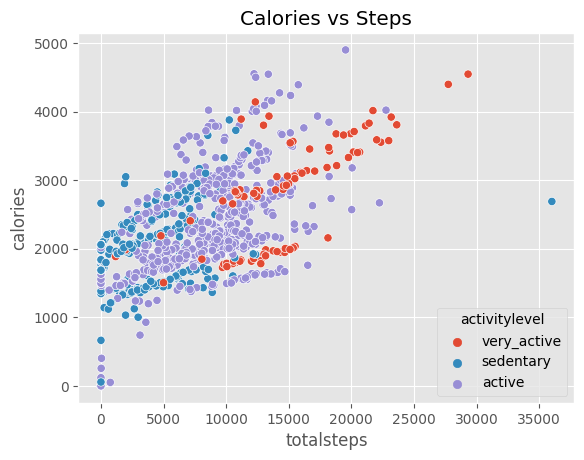

In [53]:
#share phase
#corrolation between steps and calories burned 

ax=sns.scatterplot(x='totalsteps',y='calories',data=df,hue=df['activitylevel'])
plt.title('Calories vs Steps')
plt.show()

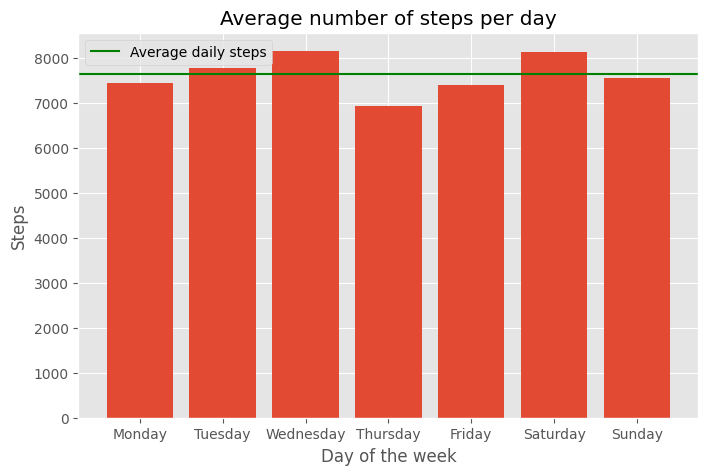

In [67]:
# average steps per day

day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps = day_grp['totalsteps'].mean()
avg_steps = df['totalsteps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)
ax.axhline(y=avg_steps, color='green', label='Average daily steps')  # Use avg_steps here

ax.set_ylabel('Steps')
ax.set_xlabel('Day of the week')
ax.set_title('Average number of steps per day')
plt.legend()
plt.show()


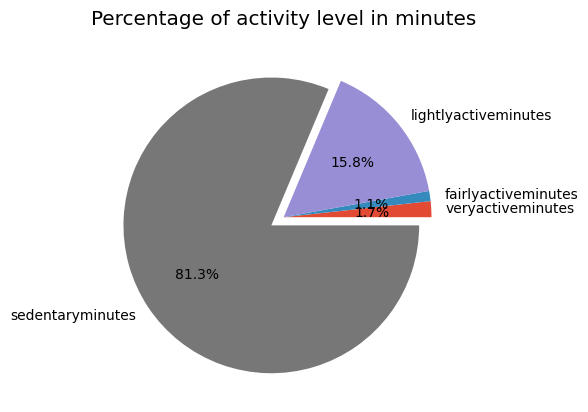

In [73]:
very_active_mins=df['veryactiveminutes'].sum()
fairly_active_mins=df['fairlyactiveminutes'].sum()
lightly_active_mins=df['lightlyactiveminutes'].sum()
sedentary_mins=df['sedentaryminutes'].sum()

slices=[very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]

labels=['veryactiveminutes','fairlyactiveminutes','lightlyactiveminutes','sedentaryminutes']

explode=[0,0,0,0.1]
plt.pie(slices,labels=labels,explode=explode,autopct='%1.1f%%')
plt.title('Percentage of activity level in minutes')
plt.show()

In [75]:
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance',
       'veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes',
       'sedentaryminutes', 'calories', 'activitylevel', 'day_of_week',
       'n_day_of_week'],
      dtype='object')

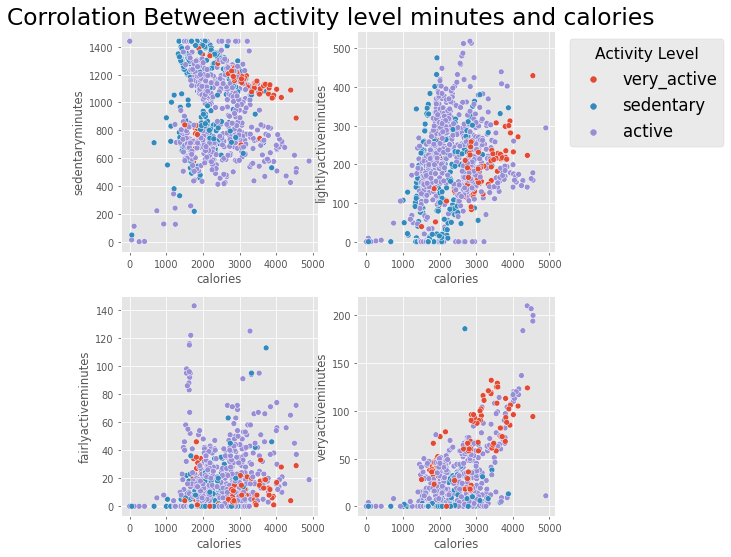

In [89]:
#corrolation between activity level in minutes and calories 

n_day_of_week=[0,1,2,3,4,5,6]

fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(8,9),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentaryminutes',hue='activitylevel',ax=axes[0,0],legend=False)
sns.scatterplot(data=df,x='calories',y='lightlyactiveminutes',hue='activitylevel',ax=axes[0,1],legend=False)
sns.scatterplot(data=df,x='calories',y='fairlyactiveminutes',hue='activitylevel',ax=axes[1,0],legend=False)
sns.scatterplot(data=df,x='calories',y='veryactiveminutes',hue='activitylevel',ax=axes[1,1],legend=True)

plt.legend(title='Activity Level',title_fontsize=16,bbox_to_anchor=(1.9,2.2),fontsize=17)
fig.suptitle('Corrolation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


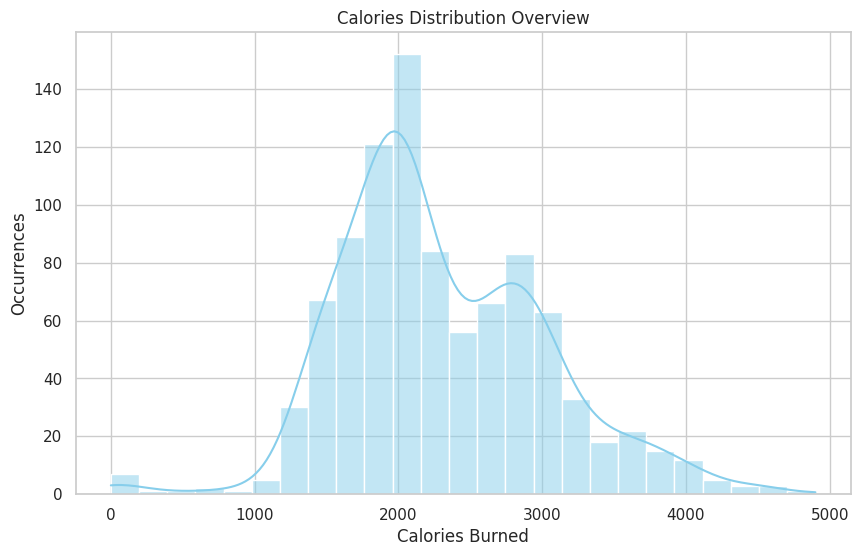

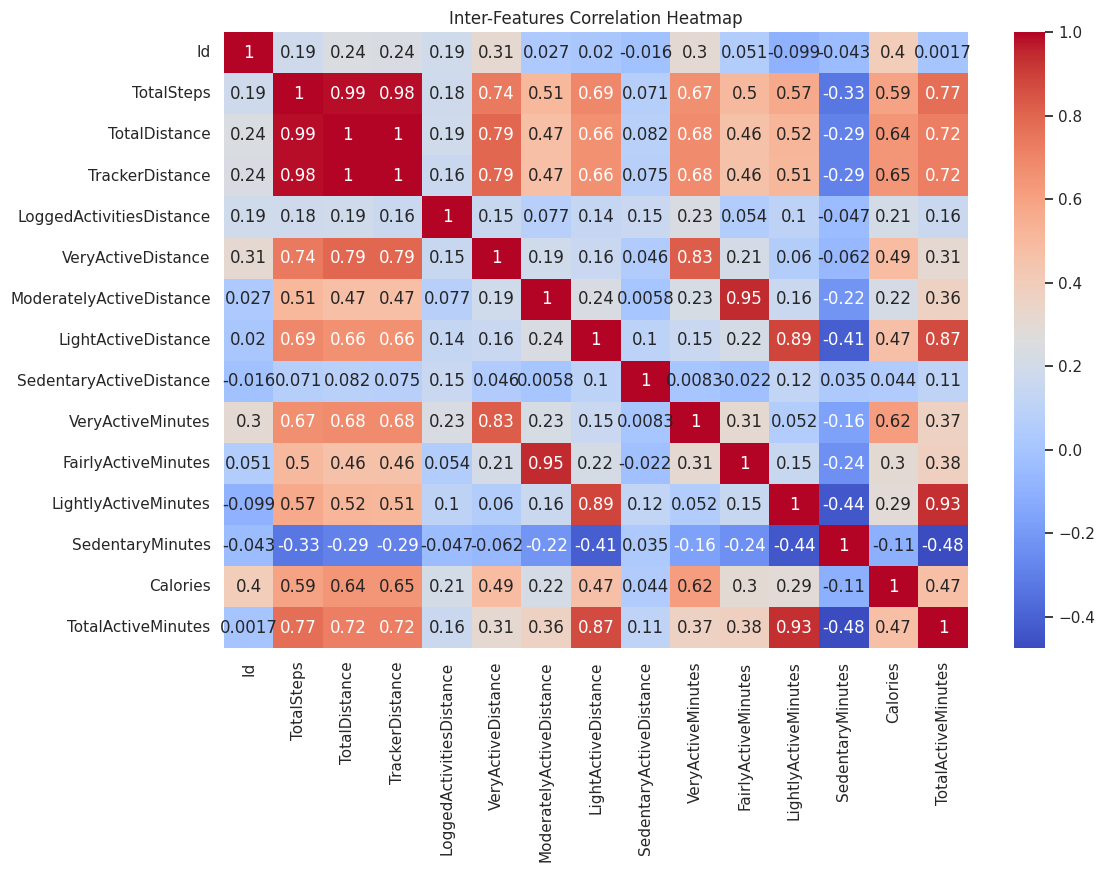

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


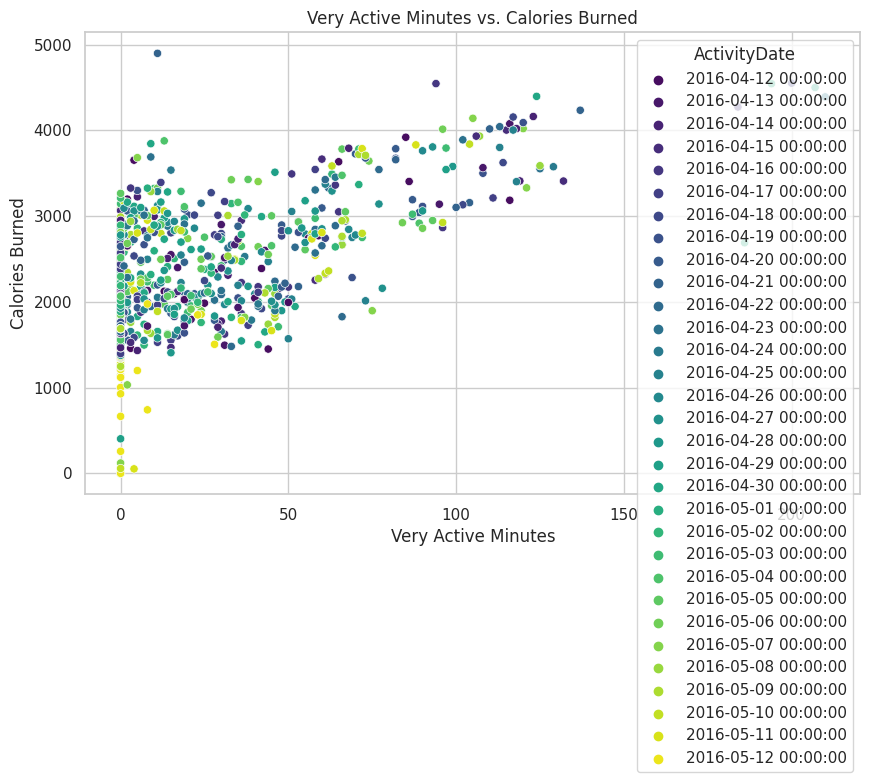

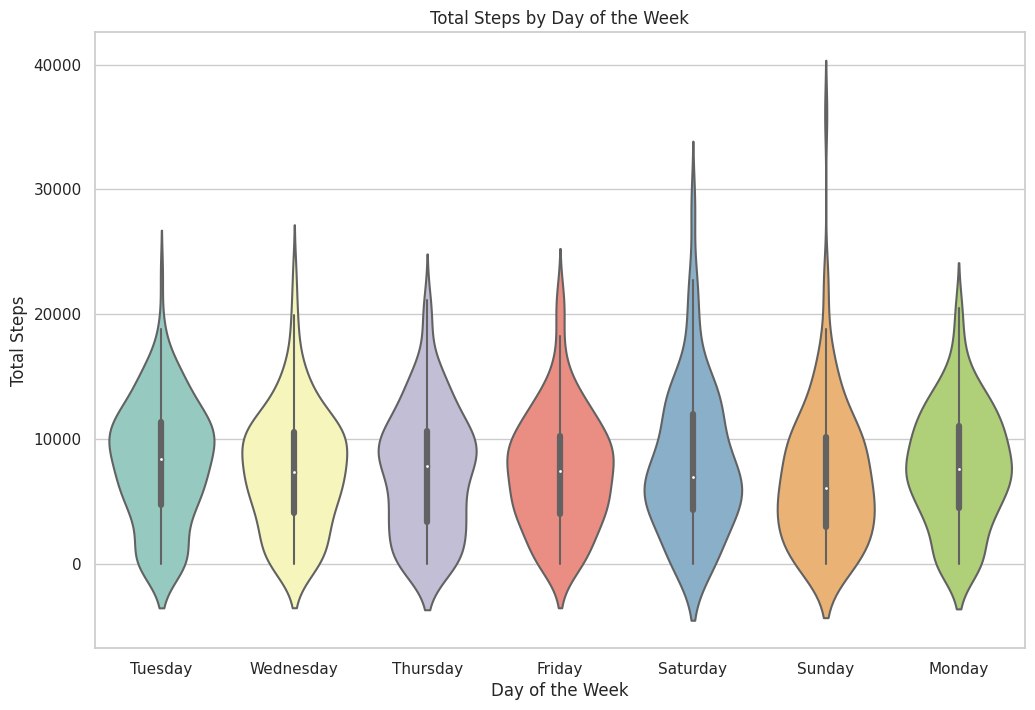

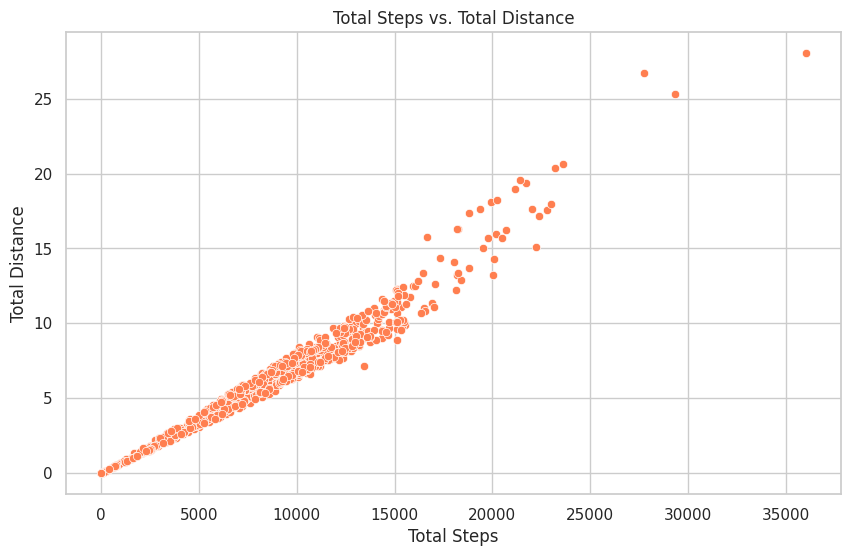

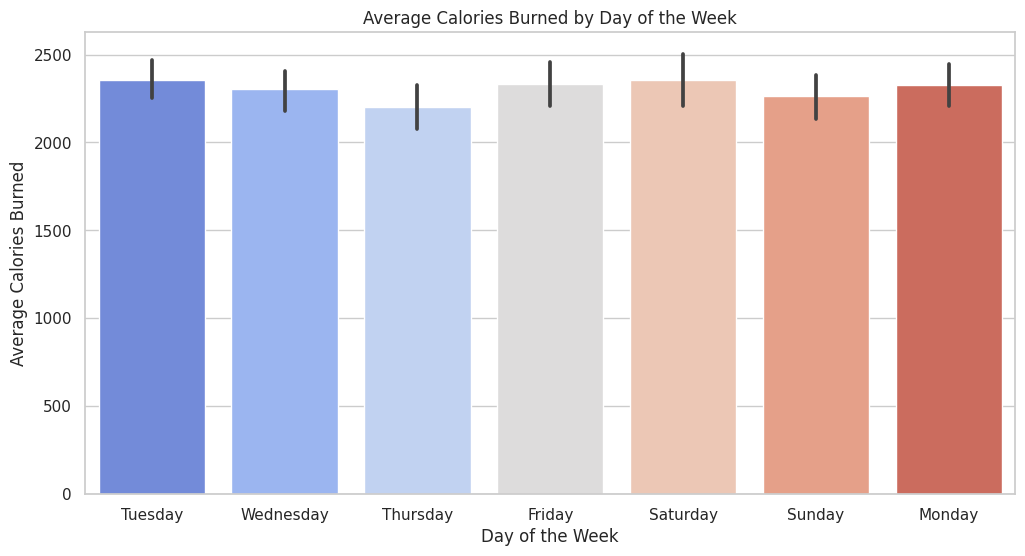

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


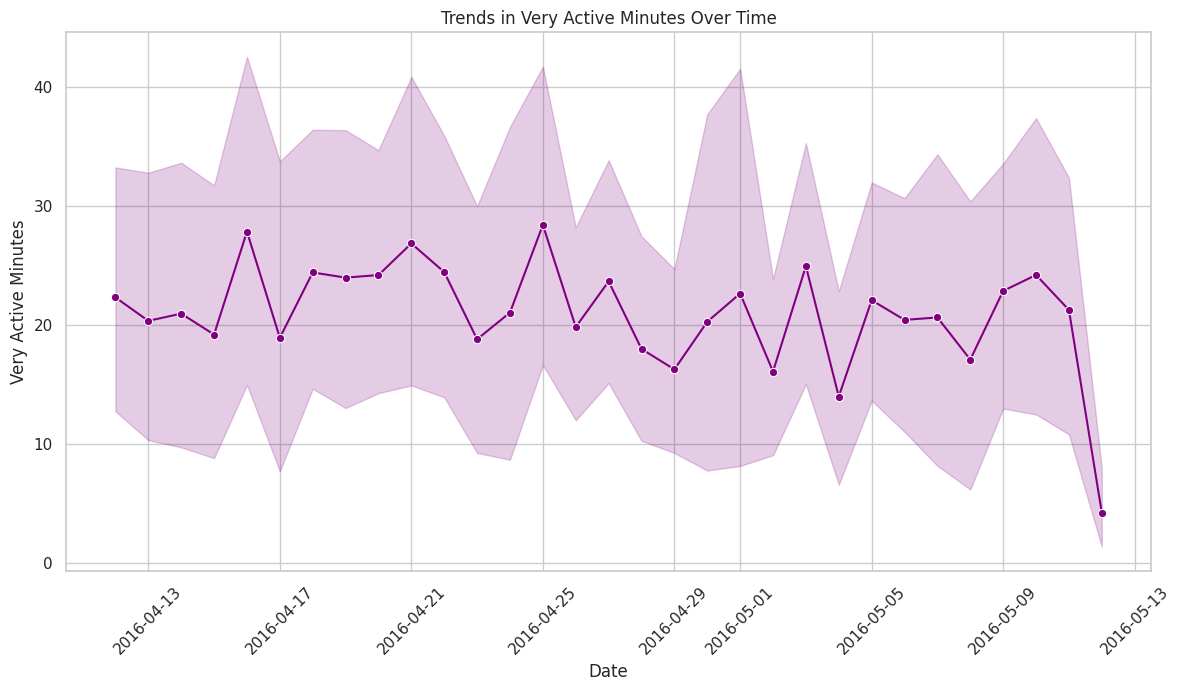

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


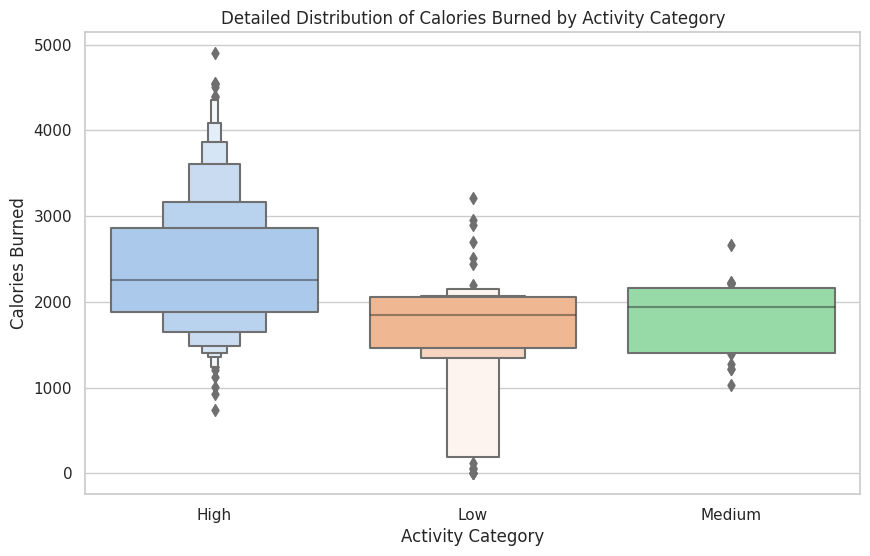

/tmp/ipykernel_33/782155673.py:109: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='DayOfWeek', y='TotalSteps', data=dataset, palette="Set2")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

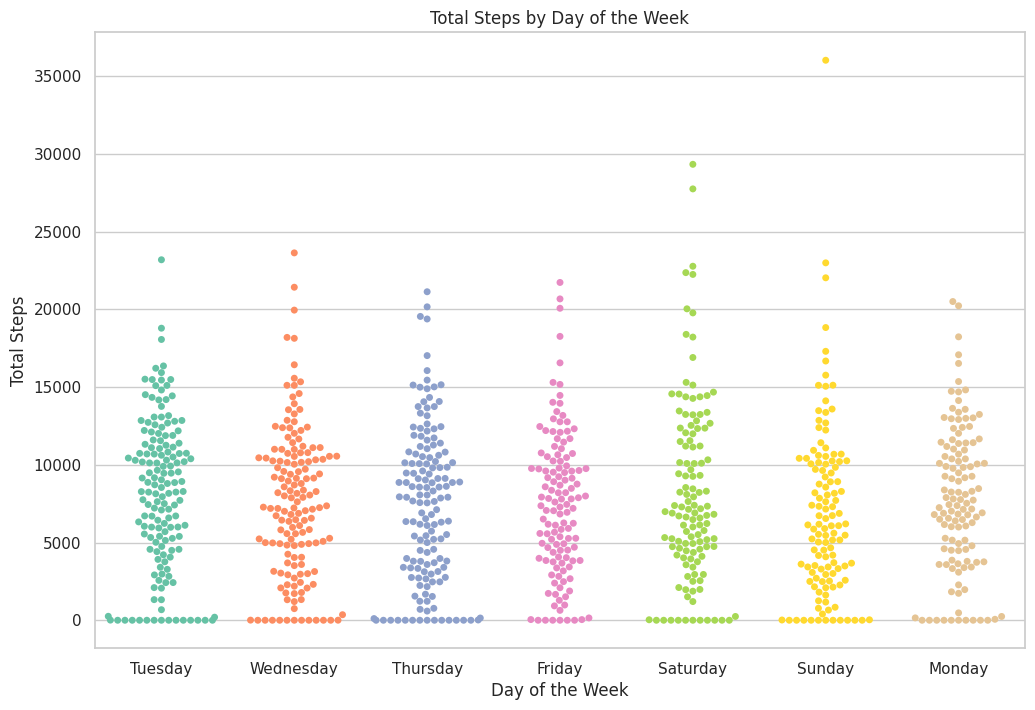

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

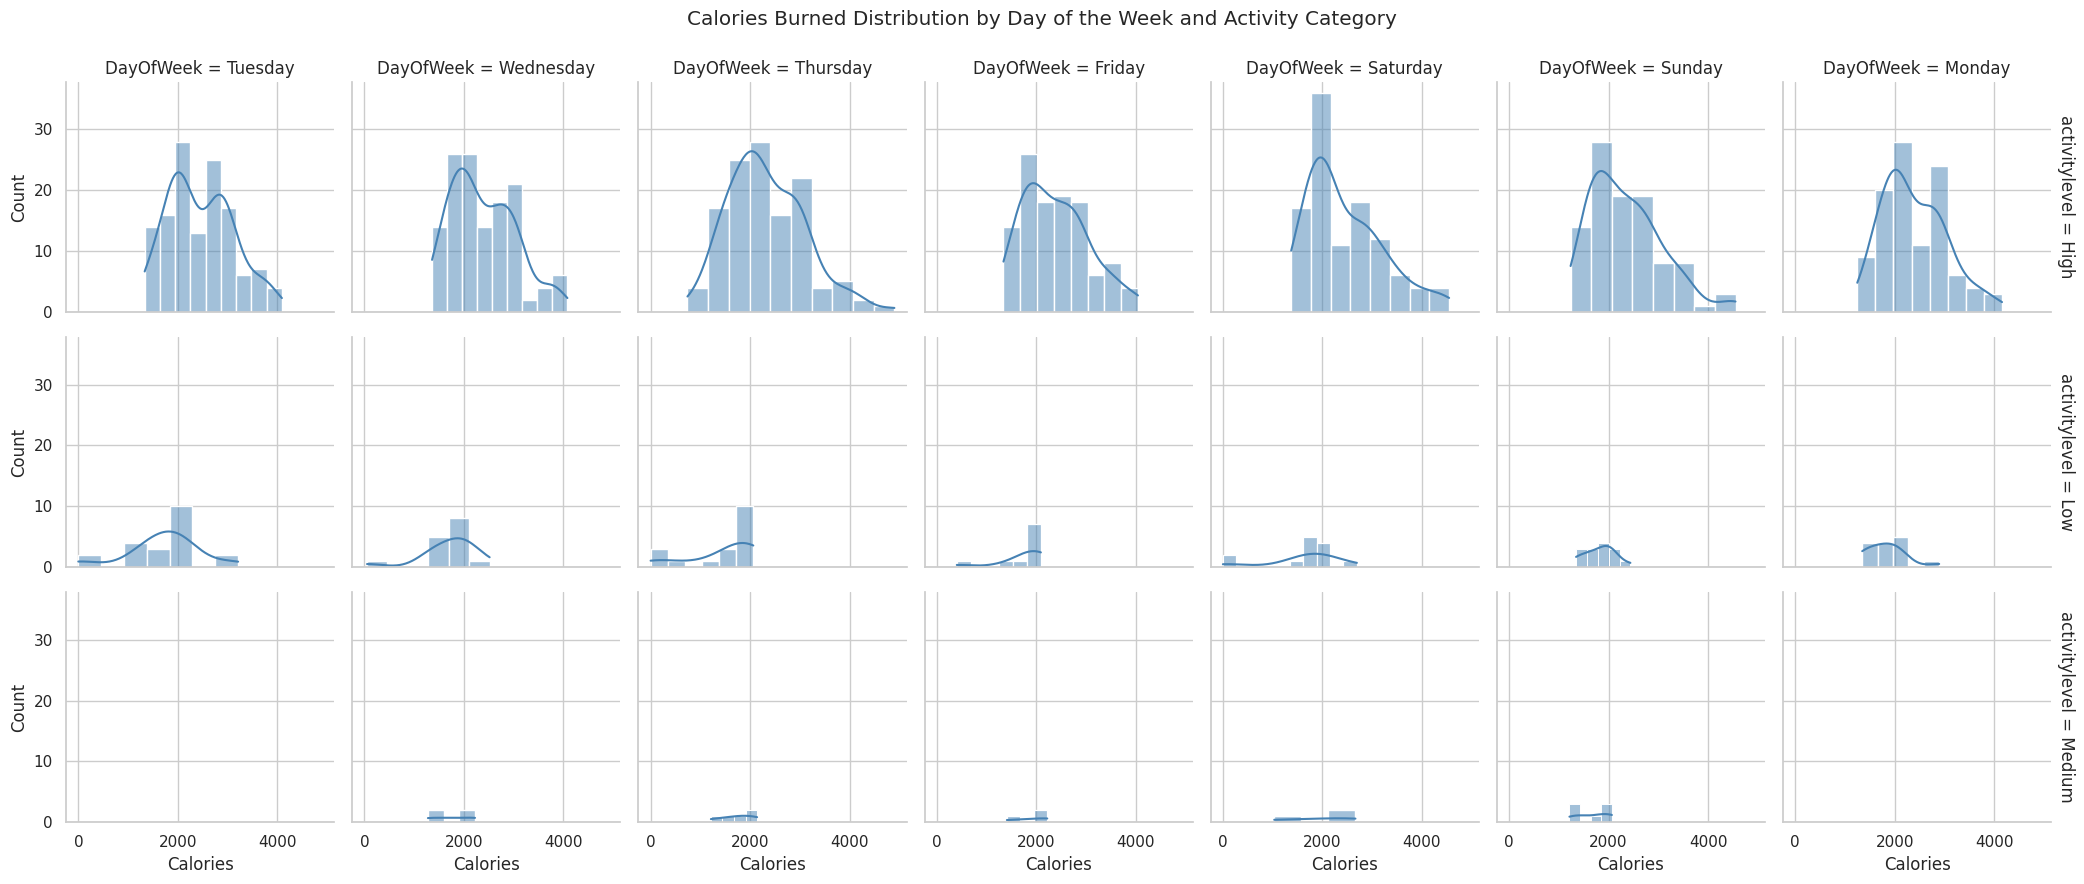

In [110]:
# Step 1: Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn style setting for more attractive and informative statistical graphics
sns.set(style="whitegrid")

# Step 2: Load the data into a DataFrame
dataset = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

# Data Cleaning Steps

# Remove duplicates
dataset = dataset.drop_duplicates()

# Fill missing values for numeric columns with median
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].median())

# Convert date columns to datetime, if applicable
dataset['ActivityDate'] = pd.to_datetime(dataset['ActivityDate'])
# Calculate the total active minutes
dataset['TotalActiveMinutes'] = dataset['VeryActiveMinutes'] + dataset['FairlyActiveMinutes'] + dataset['LightlyActiveMinutes']

# Define a function to categorize activity level
def categorize_activity_level(row):
    if row['TotalActiveMinutes'] < 30:
        return 'Low'
    elif row['TotalActiveMinutes'] <= 60:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the 'activitylevel' column
dataset['activitylevel'] = dataset.apply(categorize_activity_level, axis=1)

# Optimized Visualization Section

# Histogram for Calories Distribution to understand the general calorie burn distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Calories'], kde=True, color='skyblue')
plt.title('Calories Distribution Overview')
plt.xlabel('Calories Burned')
plt.ylabel('Occurrences')
plt.show()

# Correlation Matrix to understand how variables relate to each other
numeric_dataset = dataset.select_dtypes(include=['number'])
correlations = numeric_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Inter-Features Correlation Heatmap')
plt.show()

# Scatter Plot with Hue for VeryActiveMinutes vs. Calories to visualize any patterns between activity and calorie burn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='VeryActiveMinutes', y='Calories', hue='ActivityDate', palette="viridis")
plt.title('Very Active Minutes vs. Calories Burned')
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories Burned')
plt.show()

# Violin Plot for TotalSteps categorized by another variable (e.g., day of the week) to see distributions within categories
dataset['DayOfWeek'] = dataset['ActivityDate'].dt.day_name()
plt.figure(figsize=(12, 8))
sns.violinplot(x='DayOfWeek', y='TotalSteps', data=dataset, palette="Set3")
plt.title('Total Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.show()

# Scatter Plot for TotalSteps vs. TotalDistance to visualize their direct relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='TotalSteps', y='TotalDistance', color='coral')
plt.title('Total Steps vs. Total Distance')
plt.xlabel('Total Steps')
plt.ylabel('Total Distance')
plt.show()

# Bar Plot for Average Calories Burned by Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Calories', data=dataset, palette="coolwarm", estimator=np.mean)
plt.title('Average Calories Burned by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Calories Burned')
plt.show()

# Line Plot for Trends in Very Active Minutes over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='ActivityDate', y='VeryActiveMinutes', data=dataset, marker='o', color='purple')
plt.title('Trends in Very Active Minutes Over Time')
plt.xlabel('Date')
plt.ylabel('Very Active Minutes')
plt.xticks(rotation=45)
plt.show()


# Boxen Plot for a Detailed Distribution of Calories Burned
plt.figure(figsize=(10, 6))
sns.boxenplot(x='activitylevel', y='Calories', data=dataset, palette="pastel")
plt.title('Detailed Distribution of Calories Burned by Activity Category')
plt.xlabel('Activity Category')
plt.ylabel('Calories Burned')
plt.show()

# Swarm Plot for Total Steps by Day of the Week
plt.figure(figsize=(12, 8))
sns.swarmplot(x='DayOfWeek', y='TotalSteps', data=dataset, palette="Set2")
plt.title('Total Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.show()

# Facet Grid of Calories Burned by Day of the Week across Different Activity Categories
g = sns.FacetGrid(dataset, col='DayOfWeek', row='activitylevel', margin_titles=True)
g.map(sns.histplot, 'Calories', color='steelblue', kde=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Calories Burned Distribution by Day of the Week and Activity Category')
plt.show()